# Lab 1: The Cavendish Experiment  

For the experiment we utilized Mathmatica and video recording equipment to obtain position data of the oscilating beam. 

Equation 1.9 from the Cavendish Pasco Manual gives the calculation for $G$ with only 2 unknowns. These unknowns are the differecne in equilibrium positions $\Delta s$ & the period $T$. The following is Eq. 1.9 and all known values:

$$
G = \pi^2 \Delta s b^2 \frac{d^2+\frac{2}{5}r^2}{T^2m_1Ld}
$$

where:

$r=9.55mm$

$d=50mm$

$b=46.5mm$
    
$m_1 = 1.5kg$

$L1= 8.80216m$ {Small Measurments and Trig relations}

$L2=8.724m$  {Single Tape Mearument}


The following Wolfram Notebooks contain all initial work on the data: 
> 1. Cavendish__EvanB_Run1
> 2. Cavendish_EvanB_Run1_Pixel_to_mm 
> 3. Cavendish__EvanB_Run3
> 4. Cavendish_EvanB_Run3_Pixel_to_mm


### Below is the intial loading and processing of the data:

In [220]:
############
# Packages #
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
################
# Load in data #
###################
# - Set 1 Data
file_run1 = 'run1data.csv'
data_set_1 = np.loadtxt(file_run1, skiprows=0, delimiter=',')
# - Set 2 Data
file_run2 = 'run3data.csv'
data_set_2 = np.loadtxt(file_run2, skiprows=0, delimiter=',')


# - Set 3 Data
#file_run3 = '  .csv'
#data_set_3 = np.loadtxt(file_run3, skiprows=0, delimiter=',')
#######################
# Confirm data frames #
data_size_1 = np.shape(data_set_1)
print(data_size_1)
data_size_2 = np.shape(data_set_2)
print(data_size_2)


(714,)
(676,)


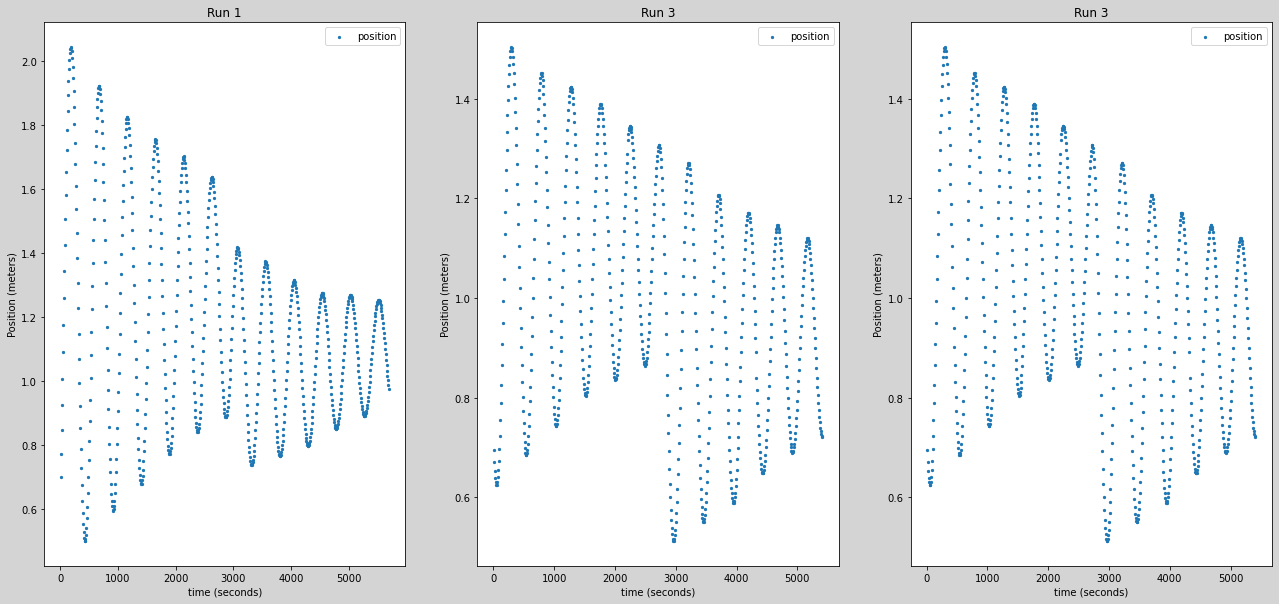

In [308]:
############################################
# Create time array for each frame of data ######### 
time_frame_1 = np.linspace(start=1,stop=data_size_1[0],num=data_size_1[0]) #
time_frame_2 = np.linspace(start=1,stop=data_size_2[0],num=data_size_2[0]) #
####################################################
## Conversions ##
###################################################

##############
# Data Set 1 #
# Time from frames to minutes                     
# - 5695.97sec/714frames                          
# - 7.97754902 sec/frame                          
time1 = time_frame_1*7.97754902                                          
##                                              
# Distance from pixels to mm                      
# - (11in*.0254m/in)/159pixel                                                             
distance_run_1 = data_set_1*((11*.0254)/159)    
##################

##############
# Data Set 2 #
# - 5408sec/676frames
# Time from frames to minutes                     
# - 8.0 sec/frame                                 
time2 = time_frame_2*8.0 
# - 280.6mm/179pixels or .2806/179 m/pixel
distance_run_2 = data_set_2*(.2806/176)
###################



##########
# Colors #
##########
#
grid_col = "#6c99fe"
Space      = "#000000"
Background = "#d3d4d3"
orbit_line = "#ff06b5"
#######################################
## Plot ##
################################################################
# Set subplot                                                  #
figure1, axis = plt.subplots( 1, 3,  figsize=(22, 10),         #
                       facecolor=Background)                   #
# Window Title                                                 #
figure1.canvas.manager.set_window_title(                       #
    'Cavendish Experioment Runs')                              #
# Run 1 Data   #################################################                                      
axis[0].scatter(time1,distance_run_1,s=5,label="position")     #
axis[0].set_title("Run 1")                                     #
axis[0].set_xlabel('time (seconds)')                           #
axis[0].set_ylabel('Position (meters)')                        #
axis[0].legend(loc='best')                                     #
# Run 3 Data   ################################################# 
axis[1].scatter(time2,distance_run_2,s=5,label="position")     #
axis[1].set_title("Run 3")                                     #
axis[1].set_xlabel('time (seconds)')                           #
axis[1].set_ylabel('Position (meters)')                        #
axis[1].legend(loc='best')                                     #
# Run 4 Data (when we get it) ##################################
axis[2].scatter(time2,distance_run_2 ,s=5,label="position")    #
axis[2].set_title("Run 3")                                     #
axis[2].set_xlabel('time (seconds)')                           #
axis[2].set_ylabel('Position (meters)')                        #
axis[2].legend(loc='best')                                     #

# Fitting function in order to extract period: 

In [183]:
################
# Fit Function #####
def Best_Fit(t, A, k, omega, phi, s):
    return A*np.exp(-k*t)*np.sin(omega*t+phi)+s

## First Experimental Run

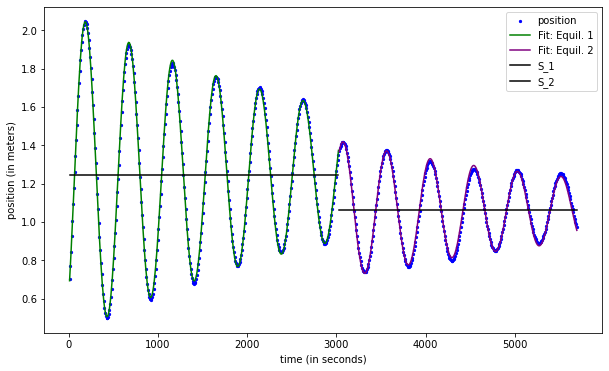


------------------------------------------
| The following are the best fit parameters 
|   and their uncertainties for the first
|    equilibrium position:
|
|   A_1 = 8.42403e-01 +/- 1.704e-03
|   k_1 = 2.96985e-04 +/- 1.485e-06
|  om_1 = 1.28654e-02 +/- 1.379e-06
| phi_1 = -8.22145e-01 +/- 1.855e-03
|   S_1 = 1.24684e+00 +/- 4.698e-04
------------------------------------------
| The following are the best fit parameters 
|   and their uncertainties for the second
|    equilibrium position:
|
|   A_2 = 8.67764e-01 +/- 1.746e-02
|   k_2 = 2.90622e-04 +/- 4.956e-06
|  om_2 = 1.28524e-02 +/- 5.062e-06
| phi_2 = -2.51091e-01 +/- 2.093e-02
|   S_2 = 1.06248e+00 +/- 6.624e-04
------------------------------------------



In [309]:
plt.figure(figsize=(10, 6))
####################################
# Plot data set 1
plt.scatter(
    time1, distance_run_1,
    s=5,
    color='blue',
    label='position'
)
##########################
# Equilibrium position 1 #
##########################
# Initial Guess
amplitude = 0.35
k = 0.0005
omega = 0.0125
phi = 0
s = 1.05
guess = np.array([amplitude, k, omega, phi, s])
#####################
# Call Fit Function
popt_run1_1, pcov_run1_1 = curve_fit(Best_Fit, time1[:379], distance_run_1[:379], p0=guess)
###########################
# Plot best fit with data 
plt.plot(
    time1[:379], fcn(time1[:379], *popt_run1_1),
    color='Green',
    label='Fit: Equil. 1'
)
##########################
# Equilibrium position 2 #
##########################
#################
# Initial Guess 
A2 = 0.3
k2 = 0.0001
om2 = 0.0125
phi2 = 0
s2 = 1.05
guess2 = np.array([A2, k2, om2, phi2, s2])
#####################
# Call Fit Function
popt_run1_2, pcov_run1_2 = curve_fit(Best_Fit, time1[379:], distance_run_1[379:], p0=guess2)
###########################
# Plot best fit with data 
plt.plot(
    time1[379:], fcn(time1[379:], *popt_run1_2),
    color='Purple',
    label='Fit: Equil. 2'
)

##############################
# Plot Equilibrium Positions #
##############################
plt.plot(
    time1[:379], popt_run1_1[4] * np.ones_like(time1[:379]),
    color='Black',
    label='S_1'
)

plt.plot(
    time1[379:], popt_run1_2[4] * np.ones_like(time1[379:]),
    color='Black',
    label='S_2'
)
#################
# Plot Settings #######################
plt.xlabel('time (in seconds)')
plt.ylabel('position (in meters)')
plt.legend(loc='best', bbox_to_anchor=(1.0, 1.0))
#############################
# Show plot and popt matrix #
plt.show()
##################
# Standard Error #
##################
# -Taking the square root of the 
#  diagnol of the covariance matrix
#  to find the standard error
perr_run1_equ1 = np.sqrt(np.diag(pcov_run1_1))  
perr_run1_equ2 = np.sqrt(np.diag(pcov_run1_2))  
##########################
# Standard Error Output
output_standard_err_run1 =f"""
{'-'*42}
| The following are the best fit parameters 
|   and their uncertainties for the first
|    equilibrium position:
|
|   A_1 = {popt_run1_1[0]:.5e} +/- {perr_run1_equ1[0]:.3e}
|   k_1 = {popt_run1_1[1]:.5e} +/- {perr_run1_equ1[1]:.3e}
|  om_1 = {popt_run1_1[2]:.5e} +/- {perr_run1_equ1[2]:.3e}
| phi_1 = {popt_run1_1[3]:.5e} +/- {perr_run1_equ1[3]:.3e}
|   S_1 = {popt_run1_1[4]:.5e} +/- {perr_run1_equ1[4]:.3e}
{'-'*42}
| The following are the best fit parameters 
|   and their uncertainties for the second
|    equilibrium position:
|
|   A_2 = {popt_run1_2[0]:.5e} +/- {perr_run1_equ2[0]:.3e}
|   k_2 = {popt_run1_2[1]:.5e} +/- {perr_run1_equ2[1]:.3e}
|  om_2 = {popt_run1_2[2]:.5e} +/- {perr_run1_equ2[2]:.3e}
| phi_2 = {popt_run1_2[3]:.5e} +/- {perr_run1_equ2[3]:.3e}
|   S_2 = {popt_run1_2[4]:.5e} +/- {perr_run1_equ2[4]:.3e}
{'-'*42}
"""
print(output_standard_err_run1)

## Third Experimental Run (Second Data Set)

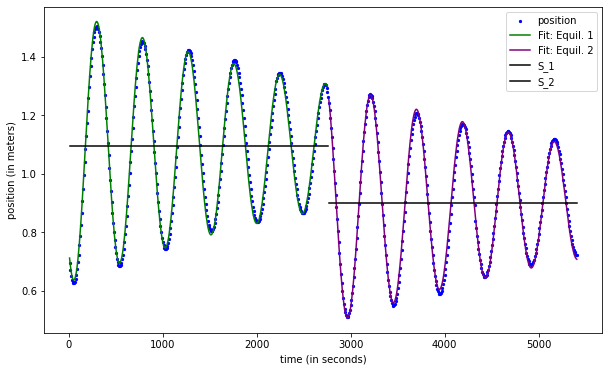


------------------------------------------
| The following are the best fit parameters 
|   and their uncertainties for the first
|    equilibrium position:
|
|   A_1 = 4.64213e-01 +/- 1.934e-03
|   k_1 = 2.82333e-04 +/- 3.271e-06
|  om_1 = 1.28707e-02 +/- 3.503e-06
| phi_1 = -2.27634e+00 +/- 4.529e-03
|   S_1 = 1.09334e+00 +/- 5.947e-04
------------------------------------------
| The following are the best fit parameters 
|   and their uncertainties for the second
|    equilibrium position:
|
|   A_2 = 9.32926e-01 +/- 1.440e-02
|   k_2 = 2.90128e-04 +/- 4.005e-06
|  om_2 = 1.28442e-02 +/- 3.825e-06
| phi_2 = -1.99671e+00 +/- 1.458e-02
|   S_2 = 9.01429e-01 +/- 5.988e-04
------------------------------------------



In [307]:
plt.figure(figsize=(10, 6))
####################################
# Plot data set 2
plt.scatter(
    time2, distance_run_2,
    s=5,
    color='blue',
    label='position'
)
##########################
# Equilibrium position 1 #
##########################
# Initial Guess
amplitude = 0.35
k = 0.0005
omega = 0.0125
phi = 0
s = 1.05
guess = np.array([amplitude, k, omega, phi, s])
#####################
# Call Fit Function
popt_run2_1, pcov_run2_1 = curve_fit(Best_Fit, time2[:345], distance_run_2[:345], p0=guess)
###########################
# Plot best fit with data 
plt.plot(
    time1[:345], fcn(time2[:345], *popt_run2_1),
    color='Green',
    label='Fit: Equil. 1'
)
##########################
# Equilibrium position 2 #
##########################
# Initial Guess
A2 = 0.3
k2 = 0.0001
om2 = 0.0125
phi2 = 0
s2 = 1.05
guess2 = np.array([A2, k2, om2, phi2, s2])
#####################
# Call Fit Function
popt_run2_2, pcov_run2_2 = curve_fit(Best_Fit, time2[345:], distance_run_2[345:], p0=guess2)
###########################
# Plot best fit with data 
plt.plot(
    time2[345:], fcn(time2[345:], *popt_run2_2),
    color='Purple',
    label='Fit: Equil. 2'
)
##############################
# Plot Equilibrium Positions #
##############################
plt.plot(
    time2[:345], popt_run2_1[4] * np.ones_like(time2[:345]),
    color='Black',
    label='S_1'
)
plt.plot(
    time2[345:], popt_run2_2[4] * np.ones_like(time2[345:]),
    color='Black',
    label='S_2'
)
#################
# Plot Settings #######################
plt.xlabel('time (in seconds)')
plt.ylabel('position (in meters)')
plt.legend(loc='best', bbox_to_anchor=(1.0, 1.0))
#############################
# Show plot and popt matrix #
plt.show()

##################
# Standard Error #
##################
# -Taking the square root of the 
#  diagnol of the covariance matrix
#  to find the standard error
perr_run2_equ1 = np.sqrt(np.diag(pcov_run2_1))  
perr_run2_equ2 = np.sqrt(np.diag(pcov_run2_2))  
##########################
# Standard Error Output
output_standard_err_run2 =f"""
{'-'*42}
| The following are the best fit parameters 
|   and their uncertainties for the first
|    equilibrium position:
|
|   A_1 = {popt_run2_1[0]:.5e} +/- {perr_run2_equ1[0]:.3e}
|   k_1 = {popt_run2_1[1]:.5e} +/- {perr_run2_equ1[1]:.3e}
|  om_1 = {popt_run2_1[2]:.5e} +/- {perr_run2_equ1[2]:.3e}
| phi_1 = {popt_run2_1[3]:.5e} +/- {perr_run2_equ1[3]:.3e}
|   S_1 = {popt_run2_1[4]:.5e} +/- {perr_run2_equ1[4]:.3e}
{'-'*42}
| The following are the best fit parameters 
|   and their uncertainties for the second
|    equilibrium position:
|
|   A_2 = {popt_run2_2[0]:.5e} +/- {perr_run2_equ2[0]:.3e}
|   k_2 = {popt_run2_2[1]:.5e} +/- {perr_run2_equ2[1]:.3e}
|  om_2 = {popt_run2_2[2]:.5e} +/- {perr_run2_equ2[2]:.3e}
| phi_2 = {popt_run2_2[3]:.5e} +/- {perr_run2_equ2[3]:.3e}
|   S_2 = {popt_run2_2[4]:.5e} +/- {perr_run2_equ2[4]:.3e}
{'-'*42}
"""
print(output_standard_err_run2)

# G Calculation for Run 1 Data

Given that $\omega \approx 0.0129$ for both equilibrium positions the period & $\Delta s$ can be found as follows:

In [310]:
##########################################
# Extract omega and calculate the period # 
##########################################

##############
# Data Set 1 #
###########################
# Eq. position 1
period_run1_1 = (2*np.pi)/popt_run1_1[2]
# Eq. position 2
period_run1_2 = (2*np.pi)/popt_run1_2[2]
# Delta-S
delta_s_run1 = popt_run1_1[4] - popt_run1_2[4] 
###########################

##############
# Data Set 2 #
###########################
# Eq. position 1
period_run2_1 = (2*np.pi)/popt_run2_1[2]
# Eq. position 2
period_run2_2 = (2*np.pi)/popt_run2_2[2]
# Delta-S
delta_s_run2 = popt_run2_1[4] - popt_run2_2[4] 
###########################
output_period_deltaS_calculations = f"""
{'-'*42}
| The period & delta-S calculations for the
|   first data set are as follows:
|
|   Eq. Pos. 1 = {period_run1_1:.5f}
|   Eq. Pos. 2 = {period_run1_2:.5f}
|   delta-S    = {delta_s_run1:.5f}
|
{'-'*42}
| The period & delta-S calculations for the
|   second data set are as follows:
|
|   Eq. Pos. 1 = {period_run2_1:.5f}
|   Eq. Pos. 2 = {period_run2_2:.5f}
|   delta-S    = {delta_s_run2:.5f}
|
{'-'*42}
"""
print(output_period_deltaS_calculations)


------------------------------------------
| The period & delta-S calculations for the
|   first data set are as follows:
|
|   Eq. Pos. 1 = 488.37916
|   Eq. Pos. 2 = 488.87338
|   delta-S    = 0.18436
|
------------------------------------------
| The period & delta-S calculations for the
|   second data set are as follows:
|
|   Eq. Pos. 1 = 488.17912
|   Eq. Pos. 2 = 489.18348
|   delta-S    = 0.19192
|
------------------------------------------



In [311]:
####################
# Define constants #
##################### 
# - Can be reused
##############
r  = 0.00955 # meter
d  = 0.05    # meter
b  = 0.0464  # meter
m1 = 1.5     # Kilogram
L1 = 8.80216 # meter
L2 = 8.724   # meter
##############

################
## G equation ##
################

#######################################################################################################
# Data Set 1                                                                                           
G_run1_period1 = (np.pi**2)*(delta_s_run1)*(b**2)*( (d**2 + (2/5)*(r**2))/((period_run1_1**2)*m1*L1*d)) 
G_run1_period2 = (np.pi**2)*(delta_s_run1)*(b**2)*( (d**2 + (2/5)*(r**2))/((period_run1_2**2)*m1*L1*d))  
# Data Set 1/ L2                                                                                          
G_run1_period1_L2 = (np.pi**2)*(delta_s_run1)*(b**2)*( (d**2 + (2/5)*(r**2))/((period_run1_1**2)*m1*L2*d)) 
G_run1_period2_L2 = (np.pi**2)*(delta_s_run1)*(b**2)*( (d**2 + (2/5)*(r**2))/((period_run1_2**2)*m1*L2*d)) 
############################################################################################################

#######################################################################################################
# Data Set 2                                                                                           
G_run2_period1 = (np.pi**2)*(delta_s_run2)*(b**2)*( (d**2 + (2/5)*(r**2))/((period_run2_1**2)*m1*L1*d)) 
G_run2_period2 = (np.pi**2)*(delta_s_run2)*(b**2)*( (d**2 + (2/5)*(r**2))/((period_run2_2**2)*m1*L1*d))  
# Data Set 2/ L2                                                                                          
G_run2_period1_L2 = (np.pi**2)*(delta_s_run2)*(b**2)*( (d**2 + (2/5)*(r**2))/((period_run2_1**2)*m1*L2*d)) 
G_run2_period2_L2 = (np.pi**2)*(delta_s_run2)*(b**2)*( (d**2 + (2/5)*(r**2))/((period_run2_2**2)*m1*L2*d)) 
############################################################################################################


####################
## G_o correction ##
####################

################################################
# Data Set 1 
G_o_run1_period1 = G_run1_period1/(1-b) 
G_o_run1_period2 = G_run1_period2/(1-b) 
# Data Set 1/ L2
G_o_run1_period1_L2  = G_run1_period1_L2 /(1-b) 
G_o_run1_period2_L2  = G_run1_period2_L2 /(1-b) 
################################################

################################################
# Data Set 2 
G_o_run2_period1 = G_run2_period1/(1-b) 
G_o_run2_period2 = G_run2_period2/(1-b) 
# Data Set 2/ L2
G_o_run2_period1_L2  = G_run2_period1_L2 /(1-b) 
G_o_run2_period2_L2  = G_run2_period2_L2 /(1-b) 
################################################


#####################
# Ratio of accuracy #
#####################
# -https://pml.nist.gov/
accepted_G = 6.67430e-11
########################

################################################
# Data Set 1 
percent_acc_run1_period1 = (G_o_run1_period1/accepted_G)*100
percent_acc_run1_period2 = (G_o_run1_period2/accepted_G)*100
# Data Set 1/ L2
percent_acc_run1_period1_L2 = (G_o_run1_period1_L2/accepted_G)*100
percent_acc_run1_period2_L2 = (G_o_run1_period2_L2/accepted_G)*100
################################################

################################################
# Data Set 2 
percent_acc_run2_period1 = (G_o_run2_period1/accepted_G)*100
percent_acc_run2_period2 = (G_o_run2_period2/accepted_G)*100
# Data Set 2/ L2
percent_acc_run2_period1_L2 = (G_o_run2_period1_L2/accepted_G)*100
percent_acc_run2_period2_L2 = (G_o_run2_period2_L2/accepted_G)*100
################################################




#######################
output_run_1 = f"""
{'-'*42}
| The gravitational constants calculated using 
|   data set 1 are as follows:
|
|   G(T1) = {G_run1_period1:.5e} m^3/kg*s
|   G(T2) = {G_run1_period2:.5e} m^3/kg*s
|
| After accounting for systematic error 
|  they were found to be:
|
|   G_o(T1) = {G_o_run1_period1:.5e} m^3/kg*s
|   G_o(T2) = {G_o_run1_period2:.5e} m^3/kg*s
|
| Compared to the accepted values these are:
|
|  (T1){percent_acc_run1_period1:.4f}% accurate
|  (T1){percent_acc_run1_period2:.4f}% accurate
{'-'*42}
| <L2> Tape Measure!
|
| The gravitational constants calculated using 
|   data set 1 are as follows:
|
|   G(T1) = {G_run1_period1_L2:.5e} m^3/kg*s
|   G(T2) = {G_run1_period2_L2:.5e} m^3/kg*s
|
| After accounting for systematic error 
|  they were found to be:
|
|   G_o(T1) = {G_o_run1_period1_L2:.5e} m^3/kg*s
|   G_o(T2) = {G_o_run1_period2_L2:.5e} m^3/kg*s
|
| Compared to the accepted values these are:
|
|  (T1){percent_acc_run1_period1_L2:.4f}% accurate
|  (T1){percent_acc_run1_period2_L2:.4f}% accurate
{'-'*42}
{'-'*42}
| The gravitational constants calculated using 
|   data set 2 are as follows:
|
|   G(T1) = {G_run2_period1:.5e} m^3/kg*s
|   G(T2) = {G_run2_period2:.5e} m^3/kg*s
|
| After accounting for systematic error 
|  they were found to be:
|
|   G_o(T1) = {G_o_run2_period1:.5e} m^3/kg*s
|   G_o(T2) = {G_o_run2_period2:.5e} m^3/kg*s
|
| Compared to the accepted values these are:
|
|  (T1){percent_acc_run2_period1:.4f}% accurate
|  (T1){percent_acc_run2_period2:.4f}% accurate
{'-'*42}
| <L2> Tape Measure!
|
| The gravitational constants calculated using 
|   data set 2 are as follows:
|
|   G(T1) = {G_run2_period1_L2:.5e} m^3/kg*s
|   G(T2) = {G_run2_period2_L2:.5e} m^3/kg*s
|
| After accounting for systematic error 
|  they were found to be:
|
|   G_o(T1) = {G_o_run2_period1_L2:.5e} m^3/kg*s
|   G_o(T2) = {G_o_run2_period2_L2:.5e} m^3/kg*s
|
| Compared to the accepted values these are:
|
|  (T1){percent_acc_run2_period1_L2:.4f}% accurate
|  (T1){percent_acc_run2_period2_L2:.4f}% accurate
{'-'*42}
"""
print(output_run_1)


------------------------------------------
| The gravitational constants calculated using 
|   data set 1 are as follows:
|
|   G(T1) = 6.31059e-11 m^3/kg*s
|   G(T2) = 6.29783e-11 m^3/kg*s
|
| After accounting for systematic error 
|  they were found to be:
|
|   G_o(T1) = 6.61765e-11 m^3/kg*s
|   G_o(T2) = 6.60427e-11 m^3/kg*s
|
| Compared to the accepted values these are:
|
|  (T1)99.1511% accurate
|  (T1)98.9508% accurate
------------------------------------------
| <L2> Tape Measure!
|
| The gravitational constants calculated using 
|   data set 1 are as follows:
|
|   G(T1) = 6.36712e-11 m^3/kg*s
|   G(T2) = 6.35426e-11 m^3/kg*s
|
| After accounting for systematic error 
|  they were found to be:
|
|   G_o(T1) = 6.67693e-11 m^3/kg*s
|   G_o(T2) = 6.66344e-11 m^3/kg*s
|
| Compared to the accepted values these are:
|
|  (T1)100.0395% accurate
|  (T1)99.8373% accurate
------------------------------------------
------------------------------------------
| The gravitational constants